In [1]:
!pip install calplot

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for calplot: filename=calplot-0.1.7.5-py3-none-any.whl size=8243 sha256=5d34bc8a6b01be5756ddbdab0660d113198a98c0eab0a08bc94cd7097e234bc0
  Stored in directory: c:\users\lilian\appdata\local\pip\cache\wheels\2c\7f\2a\c260806757b9dc3cb284bbdcce15d2ff5ee24b2cc921c8f7a4
Successfully built calplot


  DEPRECATION: Building 'calplot' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'calplot'. Discussion can be found at https://github.com/pypa/pip/issues/6334


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


Calendar heatmap has been generated and saved as 'workout_heatmap.png'


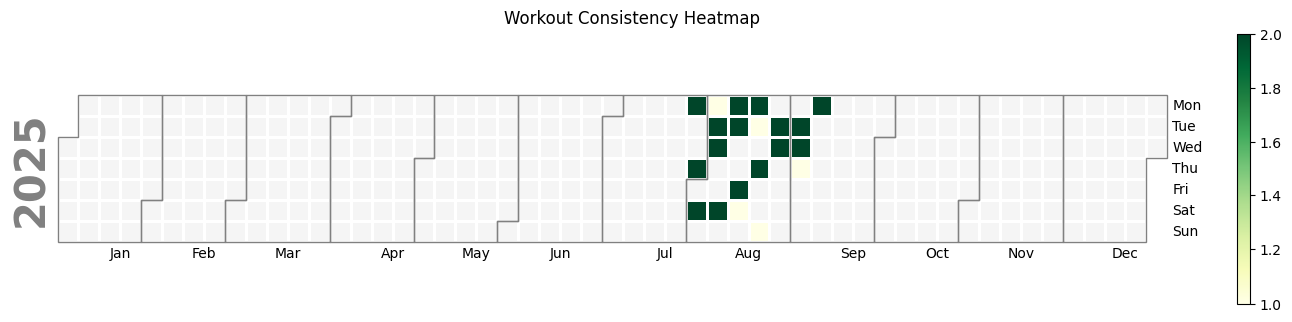

In [3]:
import pandas as pd
import calplot
import matplotlib.pyplot as plt

# --- FONT FIX ---
# Tell matplotlib to use a common font that is likely available
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
# ----------------

# Load your cleaned and completed fitness log
df = pd.read_csv(r"C:\Users\Lilian\Downloads\complete_fitness_log_final.csv")

# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

def assign_intensity(activity):
    if 'Rest' in activity:
        return 0
    elif 'Walk' in activity:
        return 1
    else:
        return 2

df['workout_intensity'] = df['activity_type'].apply(assign_intensity)
events = df.set_index('date')['workout_intensity']

fig, ax = calplot.calplot(events, cmap='YlGn', figsize=(15, 3),
                          suptitle='Workout Consistency Heatmap')
fig.savefig('workout_heatmap.png', bbox_inches='tight')
print("Calendar heatmap has been generated and saved as 'workout_heatmap.png'")  

Effort vs. Mood scatterplot has been generated and saved as 'effort_vs_mood_scatterplot.png'


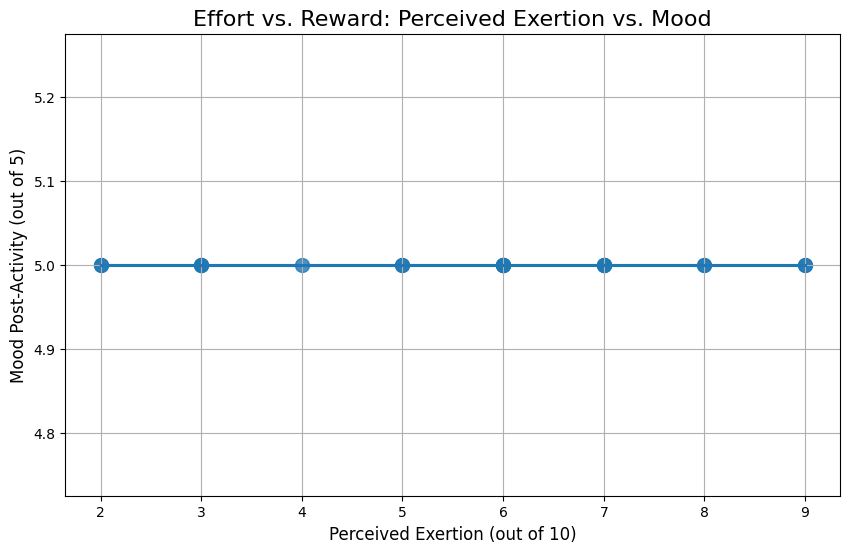

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- FONT FIX ---
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
# ----------------

df = pd.read_csv(r"C:\Users\Lilian\Downloads\complete_fitness_log_final.csv")
active_days = df[df['activity_type'] != 'Rest'].copy()

plt.figure(figsize=(10, 6))
sns.regplot(data=active_days,
            x='perceived_exertion',
            y='mood_post_activity',
            ci=None,
            scatter_kws={'s': 100})

plt.title('Effort vs. Reward: Perceived Exertion vs. Mood', fontsize=16)
plt.xlabel('Perceived Exertion (out of 10)', fontsize=12)
plt.ylabel('Mood Post-Activity (out of 5)', fontsize=12)
plt.grid(True)

plt.savefig('effort_vs_mood_scatterplot.png')
print("Effort vs. Mood scatterplot has been generated and saved as 'effort_vs_mood_scatterplot.png'")

C:\Users\Lilian\AppData\Local\Temp\ipykernel_1668\1084777596.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=active_days,


Activity breakdown bar chart has been generated and saved as 'activity_breakdown_barchart.png'


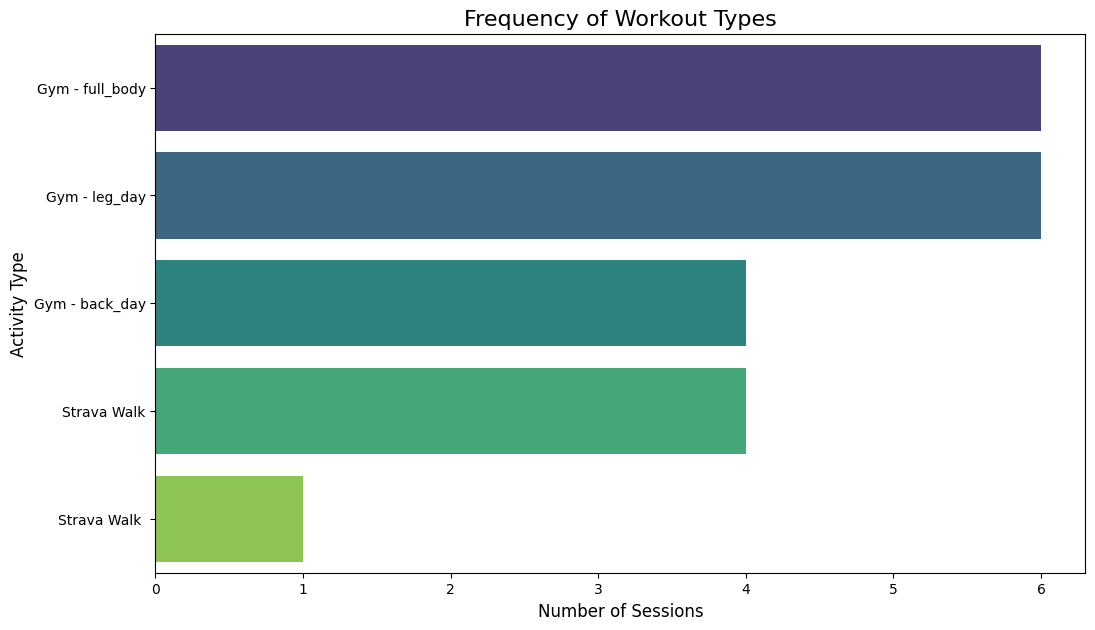

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- FONT FIX ---
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
# ----------------

df = pd.read_csv(r"C:\Users\Lilian\Downloads\complete_fitness_log_final.csv")
active_days = df[df['activity_type'] != 'Rest'].copy()

plt.figure(figsize=(12, 7))
ax = sns.countplot(data=active_days,
                   y='activity_type',
                   order=active_days['activity_type'].value_counts().index,
                   palette='viridis')

ax.set_title('Frequency of Workout Types', fontsize=16)
ax.set_xlabel('Number of Sessions', fontsize=12)
ax.set_ylabel('Activity Type', fontsize=12)

plt.savefig('activity_breakdown_barchart.png', bbox_inches='tight')
print("Activity breakdown bar chart has been generated and saved as 'activity_breakdown_barchart.png'")